Step 1: Setup & Load Data

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Customer-Churn-Records.csv to Customer-Churn-Records.csv


In [ ]:
# Load dataset (replace with your file path if needed)
df = pd.read_csv("Customer-Churn-Records.csv")

**Step 2: Explore Data**

In [ ]:
# Shape of data
print("Shape:", df.shape)

Shape: (10000, 18)


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
# Column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
# Summary statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**Step 3: Clean Data**

In [ ]:
# Example: remove duplicates if any
df = df.drop_duplicates()

# Fill missing values (if categorical, use mode; if numeric, use median)
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("Missing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64


/tmp/ipython-input-3134461107.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-3134461107.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# tenure bins
if 'Tenure' in df.columns:
    bins = [0, 6, 12, 24, 48, 120]
    labels = ['<6m','6-12m','1-2y','2-4y','4+y']
    df['TenureGroup'] = pd.cut(df['Tenure'], bins=bins, labels=labels)


# age groups
if 'Age' in df.columns:
    bins = [0, 25, 35, 45, 55, 100]
    labels = ['<25','25-34','35-44','45-54','55+']
    df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)


# high value flag (example using Balance)
if 'Balance' in df.columns:
    df['HighBalance'] = (df['Balance'] > df['Balance'].quantile(0.75)).astype(int)

In [ ]:
# Label encoding for target & small-cardinality categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in ['Gender','Card Type']:
    if c in df.columns:
        df[c] = le.fit_transform(df[c].astype(str))


# One-hot for higher-cardinality categories
# df = pd.get_dummies(df, columns=['Region','ProductType'], drop_first=True)

In [ ]:
# Save processed dataset for Power BI import
df.to_csv('/content/churn_for_powerbi.csv', index=False)

**Exploratory Data Analysis (EDA)**

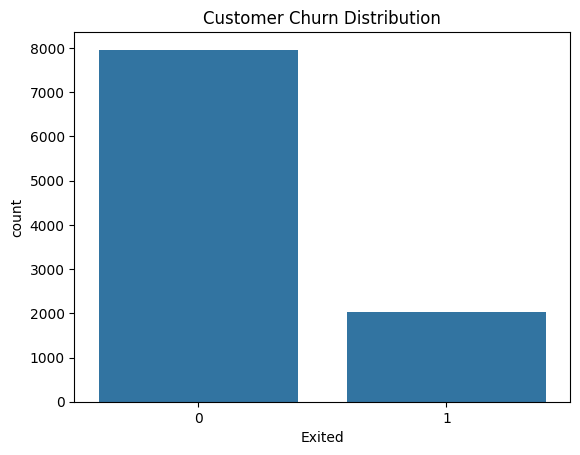

In [ ]:
# Distribution of churn
sns.countplot(x="Exited", data=df)
plt.title("Customer Churn Distribution")
plt.show()

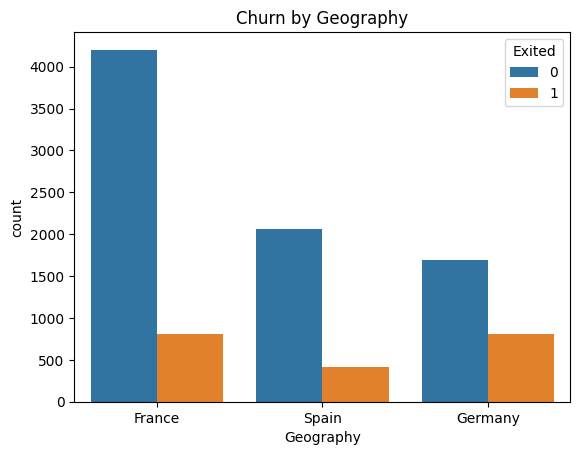

In [ ]:
# Churn by Geography
sns.countplot(x="Geography", hue="Exited", data=df)
plt.title("Churn by Geography")
plt.show()

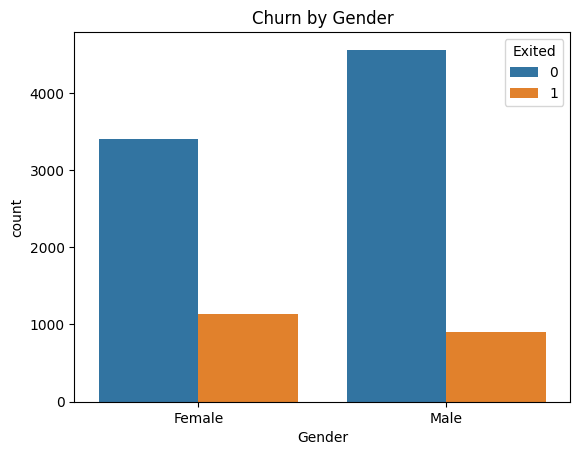

In [ ]:
# Churn by Gender
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Churn by Gender")
plt.show()

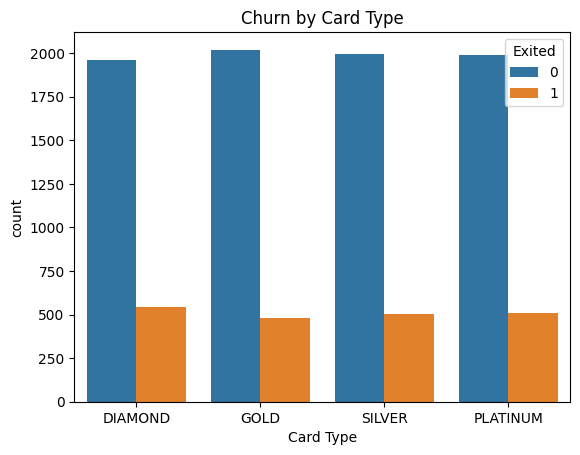

In [ ]:
# Churn by Card Type
sns.countplot(x="Card Type", hue="Exited", data=df)
plt.title("Churn by Card Type")
plt.show()

/tmp/ipython-input-2240595119.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited']==0]['Age'], label="Stayed", shade=True)
/tmp/ipython-input-2240595119.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Exited']==1]['Age'], label="Churned", shade=True)


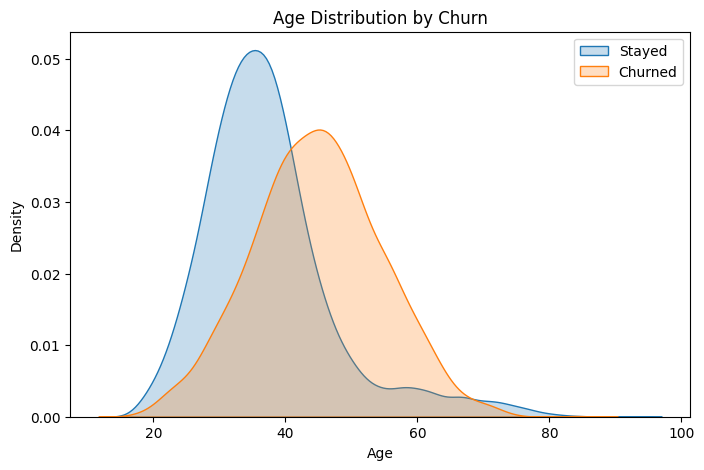

In [ ]:
# Age distribution by churn
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['Exited']==0]['Age'], label="Stayed", shade=True)
sns.kdeplot(df[df['Exited']==1]['Age'], label="Churned", shade=True)
plt.title("Age Distribution by Churn")
plt.legend()
plt.show()

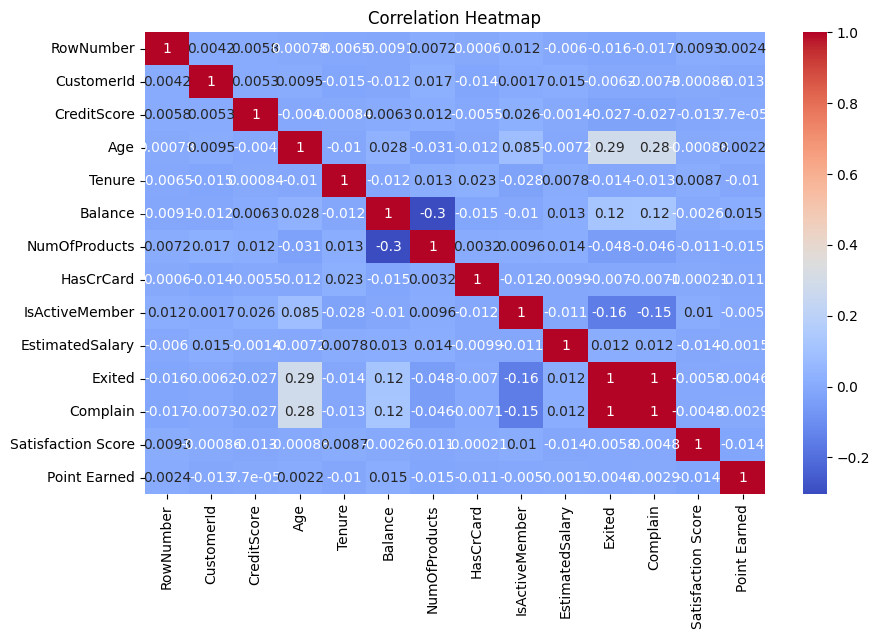

In [ ]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
from scipy.stats import chi2_contingency, ttest_ind
# chi-square
cont = pd.crosstab(df['Card Type'], df['Exited'])
chi2, p, dof, _ = chi2_contingency(cont)
print('chi2 p-value:', p)

chi2 p-value: 0.16794112067810177


In [ ]:
# churn by AgeGroup and CardType
if set(['AgeGroup','Card Type']).issubset(df.columns):
    pivot = df.pivot_table(index='AgeGroup', columns='Card Type', values='Exited', aggfunc='mean', observed=True)
    display(pivot)

Card Type,0,1,2,3
AgeGroup,,,,
<25,0.081081,0.073171,0.046667,0.100671
25-34,0.086130,0.064480,0.089773,0.099548
35-44,0.223416,0.198919,0.191097,0.173097
45-54,0.527108,0.488746,0.514451,0.490683
55+,0.366337,0.353211,0.343434,0.412088


**Step 5: Churn Rate & Key Metrics**

In [ ]:
# Overall churn rate
churn_rate = df["Exited"].mean() * 100
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 20.38%


In [ ]:
# Average tenure of churned vs retained
print("\nAverage Tenure by Churn:")
print(df.groupby("Exited")["Tenure"].mean())


Average Tenure by Churn:
Exited
0    5.032781
1    4.934740
Name: Tenure, dtype: float64


In [ ]:
# Average balance by churn
print("\nAverage Balance by Churn:")
print(df.groupby("Exited")["Balance"].mean())


Average Balance by Churn:
Exited
0    72742.750663
1    91109.476006
Name: Balance, dtype: float64


In [ ]:
# Average satisfaction score by churn
print("\nAverage Satisfaction Score by Churn:")
print(df.groupby("Exited")["Satisfaction Score"].mean())


Average Satisfaction Score by Churn:
Exited
0    3.017960
1    2.997547
Name: Satisfaction Score, dtype: float64


In [ ]:
# Churn by Geography
print("\nChurn Rate by Geography:")
print(df.groupby("Geography")["Exited"].mean() * 100)


Churn Rate by Geography:
Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


In [ ]:
# Churn by Card Type
print("\nChurn Rate by Card Type:")
print(df.groupby("Card Type")["Exited"].mean() * 100)


Churn Rate by Card Type:
Card Type
DIAMOND     21.779019
GOLD        19.264588
PLATINUM    20.360721
SILVER      20.112179
Name: Exited, dtype: float64


In [ ]:
# Revenue loss estimation (using Balance as proxy for engagement)
lost_balance = df[df["Exited"]==1]["Balance"].sum()
print(f"\nTotal Balance Lost due to Churn: {lost_balance:,.2f}")


Total Balance Lost due to Churn: 185,681,112.10


In [ ]:
# Overall churn rate
churn_rate = df['Exited'].mean() * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")


Overall Churn Rate: 20.38%


**Metrics to produce**

In [ ]:
# Example: churn table by Geography and Card Type
metrics = df.groupby(['Geography','Card Type']).agg(
    TotalCustomers = ('Exited','count'),
    Churned = ('Exited','sum'),
    ChurnRate = ('Exited','mean'),
    AvgTenure = ('Tenure','mean')
).reset_index()

metrics['ChurnRatePct'] = metrics['ChurnRate']*100
display(metrics)
metrics.to_csv('/content/churn_metrics_by_geography_card.csv', index=False)

,Geography,Card Type,TotalCustomers,Churned,ChurnRate,AvgTenure,ChurnRatePct
0,France,0,1230,221,0.179675,4.965854,17.967480
1,France,1,1235,190,0.153846,5.068826,15.384615
2,France,2,1264,194,0.153481,4.936709,15.348101
3,France,3,1285,206,0.160311,5.046693,16.031128
4,Germany,0,648,220,0.339506,4.970679,33.950617
5,Germany,1,653,201,0.307810,5.119449,30.781011
6,Germany,2,608,205,0.337171,4.858553,33.717105
7,Germany,3,600,188,0.313333,5.086667,31.333333
8,Spain,0,629,105,0.166932,5.133545,16.693164
9,Spain,1,614,91,0.148208,5.037459,14.820847


**Churn prediction**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


# Prepare features (example)
features = ['Age','Tenure','Balance','NumOfProducts','HighBalance']
features = [c for c in features if c in df.columns]
X = df[features].fillna(0)
y = df['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)


y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1991
           1       0.58      0.44      0.50       509

    accuracy                           0.82      2500
   macro avg       0.72      0.68      0.70      2500
weighted avg       0.81      0.82      0.81      2500

ROC AUC: 0.790104093173702


In [ ]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
display(importances)

,0
Age,0.356509
Balance,0.337420
NumOfProducts,0.158210
Tenure,0.140252
HighBalance,0.007610


In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
# Recalculate SHAP values, potentially with check_additivity=False as a workaround for some issues
shap_vals = explainer.shap_values(X_test, check_additivity=False)

# For binary classification, shap_values is a list of arrays (one for each class).
# We usually plot the SHAP values for the positive class (index 1).
# Check the shapes before plotting
if isinstance(shap_vals, list):
    if len(shap_vals) > 1:
        shap_values_to_plot = shap_vals[1]
    else:
        # Handle cases with only one class
        shap_values_to_plot = shap_vals[0]
else:
    # If shap_vals is not a list, assume it's already the correct array
    shap_values_to_plot = shap_vals

print(f"Shape of SHAP values to plot: {shap_values_to_plot.shape}")
print(f"Shape of X_test: {X_test.shape}")

# Ensure the shapes match for plotting
if shap_values_to_plot.shape == X_test.shape:
    shap.summary_plot(shap_values_to_plot, X_test)
else:
    print("Error: Shape mismatch between SHAP values and X_test for plotting.")

Shape of SHAP values to plot: (2500, 5, 2)
Shape of X_test: (2500, 5)
Error: Shape mismatch between SHAP values and X_test for plotting.
